# Linear regression model in Python to predict the CTC/Salary of new hires from the data provided

In [127]:
# importing libraries  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Training Dataset

In [128]:
#importing training datasets  
data_set= pd.read_excel('Data_file.xlsx',header=2)

In [129]:
data_set

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...,...
1333,1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1334,1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1335,1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1336,1337,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


In [130]:
data_set = data_set.drop("S.No.",axis=1)

In [131]:
data_set.shape

(1338, 8)

In [132]:
#info
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [133]:
# descriptions
data_set.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [134]:
# class distribution

print(data_set.groupby('College').size(),"\n\n ",data_set.groupby('Role').size(),"\n\n",data_set.groupby('Role').size())

College
Tier 1    649
Tier 2    364
Tier 3    325
dtype: int64 

  Role
Executive    1064
Manager       274
dtype: int64 

 Role
Executive    1064
Manager       274
dtype: int64




# Data Visualization

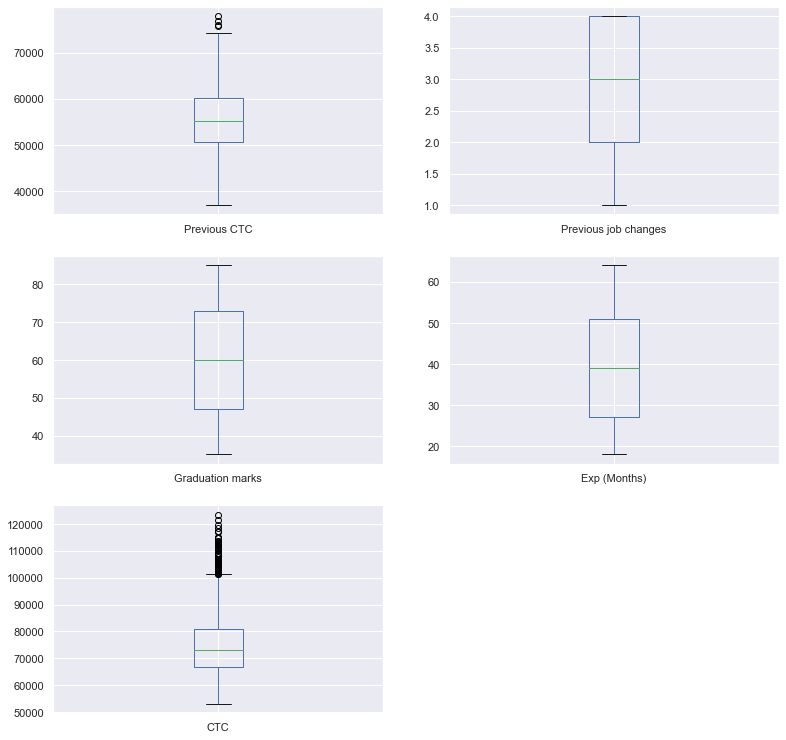

In [135]:
# box and whisker plots
plt.rcParams["figure.figsize"] = (13,13)
data_set.plot(kind='box',   subplots=True, layout=(3,2), sharex=False, sharey=False)

plt.show()

array([[<AxesSubplot:title={'center':'Previous CTC'}>,
        <AxesSubplot:title={'center':'Previous job changes'}>],
       [<AxesSubplot:title={'center':'Graduation marks'}>,
        <AxesSubplot:title={'center':'Exp (Months)'}>],
       [<AxesSubplot:title={'center':'CTC'}>, <AxesSubplot:>]],
      dtype=object)

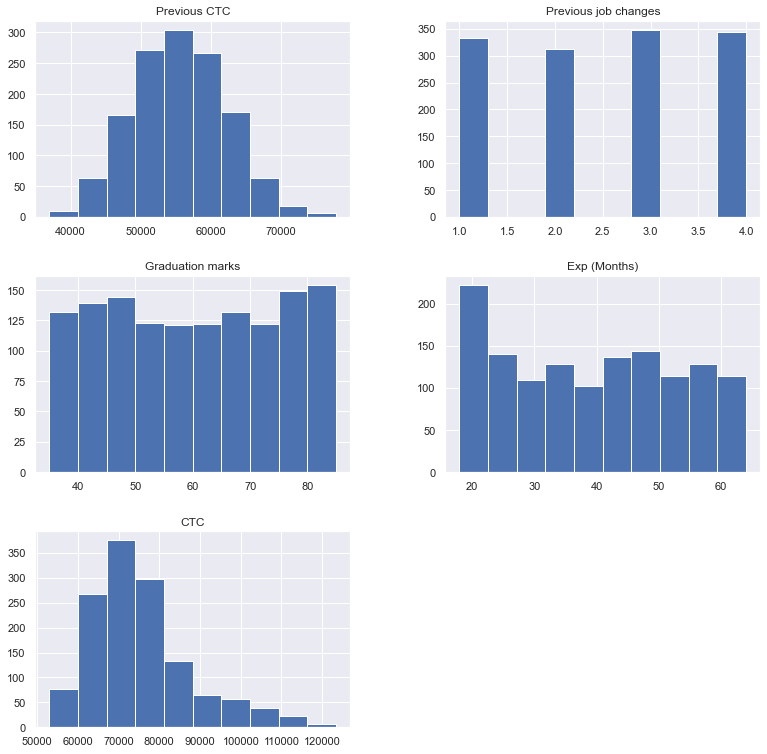

In [136]:
plt.rcParams["figure.figsize"] = (13,13)

data_set.hist()


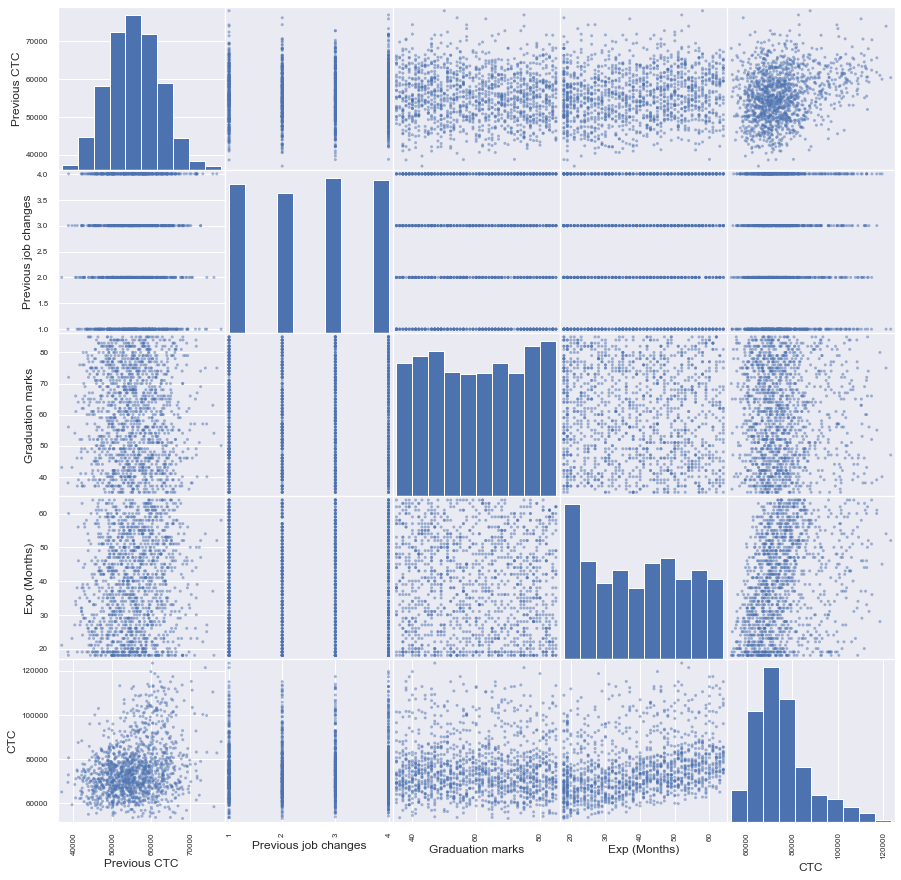

In [137]:
from pandas.plotting   import scatter_matrix
plt.rcParams["figure.figsize"] = (15,15)
scatter_matrix(data_set)

plt.show()

<AxesSubplot:xlabel='College', ylabel='CTC'>

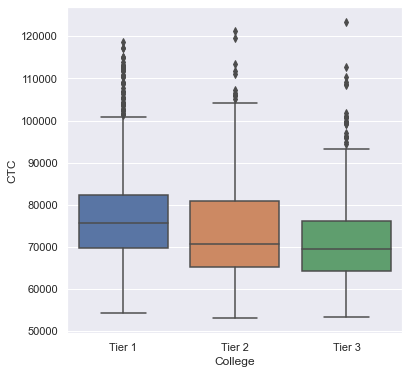

In [138]:
sb.set(rc = {'figure.figsize':(6,6)})
sb.boxplot(x= data_set.College, y = data_set.CTC)

<AxesSubplot:xlabel='Role', ylabel='CTC'>

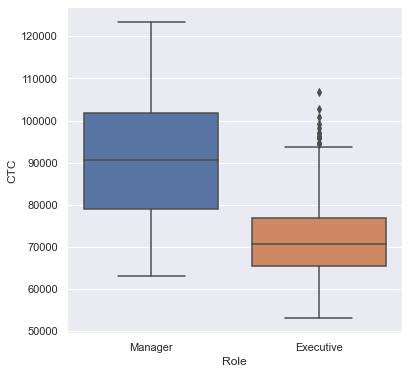

In [139]:
sb.boxplot(x= data_set.Role, y = data_set.CTC)

<AxesSubplot:xlabel='City type', ylabel='CTC'>

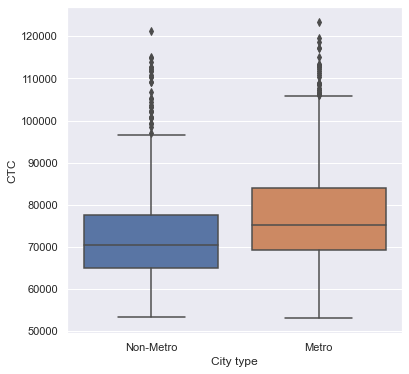

In [140]:
sb.boxplot(x= data_set.iloc[:,2], y = data_set.CTC)

# Converting Categorical Variables to Numerical Variable

In [141]:
#Creating dummy variables

data_set['Role_Manager'] = data_set.Role.map({'Executive':0,'Manager':1})

In [142]:
data_set['City_Metro'] = data_set.iloc[:,2].map({'Metro':1,'Non-Metro':0})

In [143]:
dummy_college=pd.get_dummies(data_set.College, prefix='College').iloc[:,:2]

In [144]:
data_set = pd.concat([data_set,dummy_college], axis=1)

In [145]:
data_set

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Role_Manager,City_Metro,College_Tier 1,College_Tier 2
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531,1,0,1,0
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631,0,1,0,1
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277,0,1,0,1
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880,0,1,0,0
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50,69712.403655,0,1,0,0
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099,0,0,1,0
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686,0,0,0,1
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949,0,0,1,0


In [146]:
#making the names same as Test data set
data_set.rename(columns = {'College_Tier 1':'College_T1', 'College_Tier 2':'College_T2'}, inplace = True)

In [147]:
#reordering
data_set = data_set[['College', 'Role', 'City type', 'College_T1','College_T2', 'Role_Manager', 'City_Metro',
                     'Previous CTC','Previous job changes','Graduation marks','Exp (Months)','CTC']]
data_set

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,50,69712.403655
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,18,69298.750099
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,18,66397.770686
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,21,64044.382949


# Training Using Linear Regression Algorithm

In [148]:
#Extracting Independent and dependent Variable  
x_train= data_set.iloc[:, 3:-1].values 
y_train= data_set.iloc[:, -1].values 

In [149]:
x_train

array([[ 1,  0,  1, ...,  3, 66, 19],
       [ 0,  1,  0, ...,  1, 84, 18],
       [ 0,  1,  0, ...,  2, 52, 28],
       ...,
       [ 0,  1,  0, ...,  1, 47, 18],
       [ 1,  0,  0, ...,  3, 69, 21],
       [ 0,  0,  1, ...,  1, 47, 61]], dtype=int64)

In [150]:
y_train

array([71406.57653108, 68005.87063056, 76764.02027697, ...,
       66397.77068649, 64044.38294859, 83346.06096109])

In [151]:
#Indroducing Lieniar Regression algorithm to the training set:  
from sklearn.linear_model import LinearRegression  
model= LinearRegression()  
model.fit(x_train,y_train)  

LinearRegression()

# Test Dataset

In [152]:
#importing testing datasets  
dt_test= pd.read_excel('Test_data_file.xlsx')

In [153]:
dt_test


,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
dt_test=dt_test.iloc[:,:13]

In [155]:
dt_test

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,50,69712.403655,NaN
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,18,69298.750099,NaN
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,18,66397.770686,NaN
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,21,64044.382949,NaN


In [156]:
# descriptions
dt_test.iloc[:,7:-1].describe()

,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [157]:
# class distribution

print(dt_test.groupby('College').size(),"\n\n ",data_set.groupby('Role').size(),"\n\n",data_set.groupby('Role').size())

College
Tier 1    649
Tier 2    364
Tier 3    325
dtype: int64 

  Role
Executive    1064
Manager       274
dtype: int64 

 Role
Executive    1064
Manager       274
dtype: int64


# Testing the Linear Regression Model

In [158]:
x_test = dt_test.iloc[:,3:-2].values 
x_test

array([[ 1,  0,  1, ...,  3, 66, 19],
       [ 0,  1,  0, ...,  1, 84, 18],
       [ 0,  1,  0, ...,  2, 52, 28],
       ...,
       [ 0,  1,  0, ...,  1, 47, 18],
       [ 1,  0,  0, ...,  3, 69, 21],
       [ 0,  0,  1, ...,  1, 47, 61]], dtype=int64)

In [91]:
#Predicting the Test set result;  
y_pred= model.predict(x_test)

In [92]:
y_pred

array([86123.93814045, 65789.54652723, 69941.69030153, ...,
       64046.07444784, 66223.22234281, 90794.94065705])

In [93]:
dt_test.iloc[:,-1] = y_pred

In [99]:
dt_test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,86123.938140
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,65789.546527
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,69941.690302
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,66843.038384
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,70556.761762


In [98]:
dt_test.iloc[:,11:].head(20)

,Actual CTC,Predicted CTC
0,71406.576531,86123.938140
1,68005.870631,65789.546527
2,76764.020277,69941.690302
3,82092.386880,66843.038384
4,73878.097729,70556.761762
5,59950.892245,63790.433361
6,66602.339307,70565.481044
7,57768.435037,64311.320434
8,70083.304362,74488.051059
9,85648.481469,70869.424363


In [105]:
y_actual=dt_test.iloc[:,11]

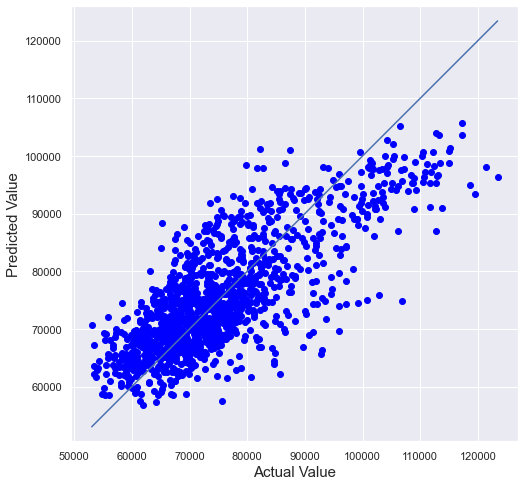

In [108]:
#plotting our prediction
plt.figure(figsize=(8,8))
plt.scatter(y_actual, y_pred, c='blue')
p1 = max(max(y_pred), max(y_actual))
p2 = min(min(y_pred), min(y_actual))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Value', fontsize=15)
plt.ylabel('Predicted Value', fontsize=15)
plt.axis('equal')
plt.show()

In [34]:
dt_test.to_excel('Test_result.xlsx')

# Model Evaluation

In [124]:
from sklearn.metrics   import mean_squared_error
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import r2_score

In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_actual, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
print("R2 score: ",r2_score(y_actual, y_pred))

Mean Absolute Error: 6159.175547850491
Mean Squared Error: 61677937.0453096
Root Mean Squared Error: 7853.530228203722
R2 score:  0.6081873160506195
